### IRONHACK - DATA ANALYTICS

### w2-pandas-project - Data cleaning & wrangling 


### SHARK ATTACKS

### David Tejedor Sánchez
### 30/10/2022

In [1]:
#%pip install ipython
#%pip install seaborn

In [2]:
# importación de librerías
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [3]:
# importación de csv
data_ori = pd.read_csv(r'C:\Users\david\OneDrive\Documentos\DATA ANALYTICS\Proyectos\Github\Ironhack_proyectos\w2-Pandas-Data-cleaning-and-wrangling\data\attacks.csv', encoding='latin1')

In [4]:
data_ori.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
# copa del df original
data=data_ori.copy()

In [6]:
# exploración inicial df
data.shape

(25723, 24)

In [7]:
data.tail() # se identifica un valor 'xx' en la row 25722

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data['Case Number'][25722] = data['Case Number'][25721] # se iguala el valor a NaN

In [9]:
dim_orig=data.shape # copia de las dimensiones originales

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,8701,6286,0,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
Type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [12]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8701 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [13]:
# Columnas numéricas
num_data=data.select_dtypes(exclude='object')

num_data.columns

Index(['Year', 'original order'], dtype='object')

In [14]:
len(num_data.columns)

2

In [15]:
# Columnas categóricas
cat_data=data.select_dtypes(exclude=['int64', 'float64'])

cat_data.columns

Index(['Case Number', 'Date', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [16]:
len(cat_data.columns)

22

In [17]:
# Valores nulos
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

Case Number               17022
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [18]:
nan_cols_perc=data.isna().mean()*100

nan_cols_perc[nan_cols_perc>0]

Case Number               66.174241
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

In [19]:
nan_cols_perc=data.isna().mean()*100

nan_cols_perc[nan_cols_perc>80]

Age            86.506240
Time           88.539439
Species        86.533453
Unnamed: 22    99.996112
Unnamed: 23    99.992225
dtype: float64

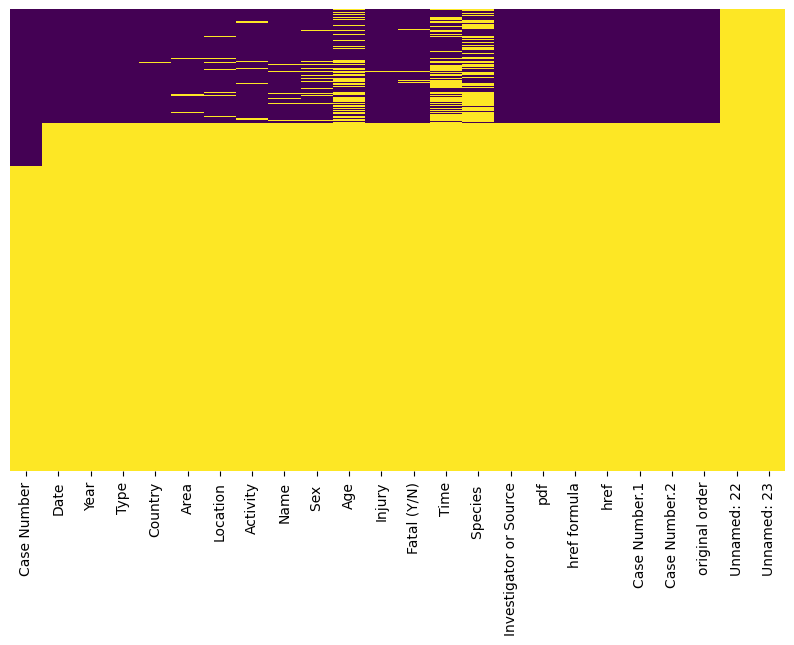

In [20]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(data.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [21]:
cols_orig = data.columns

In [22]:
cols_orig

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [23]:
data.dropna(subset=cols_orig,inplace=True, how='all')

In [24]:
data.shape

(8702, 24)

In [25]:
data.drop_duplicates().shape==data.shape

False

In [26]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [27]:
data.drop_duplicates(inplace=True)

In [28]:
data.drop_duplicates().shape==data.shape

True

In [29]:
data1 = data.copy() # copia tras eliminar filas

In [30]:
data1_dim = data.shape
data1_dim

(6310, 24)

In [31]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [32]:
# comienzo a analizar los nulos por columnas 
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

Case Number                  1
Date                         8
Year                        10
Type                        12
Country                     58
Area                       463
Location                   548
Activity                   552
Name                       218
Sex                        573
Age                       2839
Injury                      36
Fatal (Y/N)                547
Time                      3362
Species                   2846
Investigator or Source      25
pdf                          8
href formula                 9
href                         8
Case Number.1                8
Case Number.2                8
original order               1
Unnamed: 22               6309
Unnamed: 23               6308
dtype: int64

In [33]:
nan_cols_perc=data.isna().mean()*100

nan_cols_perc[nan_cols_perc>0]

Case Number                0.015848
Date                       0.126783
Year                       0.158479
Type                       0.190174
Country                    0.919176
Area                       7.337559
Location                   8.684628
Activity                   8.748019
Name                       3.454834
Sex                        9.080824
Age                       44.992076
Injury                     0.570523
Fatal (Y/N)                8.668780
Time                      53.280507
Species                   45.103011
Investigator or Source     0.396197
pdf                        0.126783
href formula               0.142631
href                       0.126783
Case Number.1              0.126783
Case Number.2              0.126783
original order             0.015848
Unnamed: 22               99.984152
Unnamed: 23               99.968304
dtype: float64

In [34]:
# exploracion columnas 'Unnamed: 22' y 'Unnamed: 23'

In [35]:
data['Unnamed: 22'].unique()

array([nan, 'stopped here'], dtype=object)

In [36]:
data['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [37]:
data['Unnamed: 23'].unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [38]:
data['Unnamed: 23'].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

In [39]:
# ambas columnas no aportan info, pueden borrarse
data.drop(columns=['Unnamed: 22', 'Unnamed: 23'], inplace=True)

In [40]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [41]:
# renombrar nombres de columnas
data.columns=[c.lower().replace(' ', '') for c in data.columns]

data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [42]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

casenumber                 1
date                       8
year                      10
type                      12
country                   58
area                     463
location                 548
activity                 552
name                     218
sex                      573
age                     2839
injury                    36
fatal(y/n)               547
time                    3362
species                 2846
investigatororsource      25
pdf                        8
hrefformula                9
href                       8
casenumber.1               8
casenumber.2               8
originalorder              1
dtype: int64

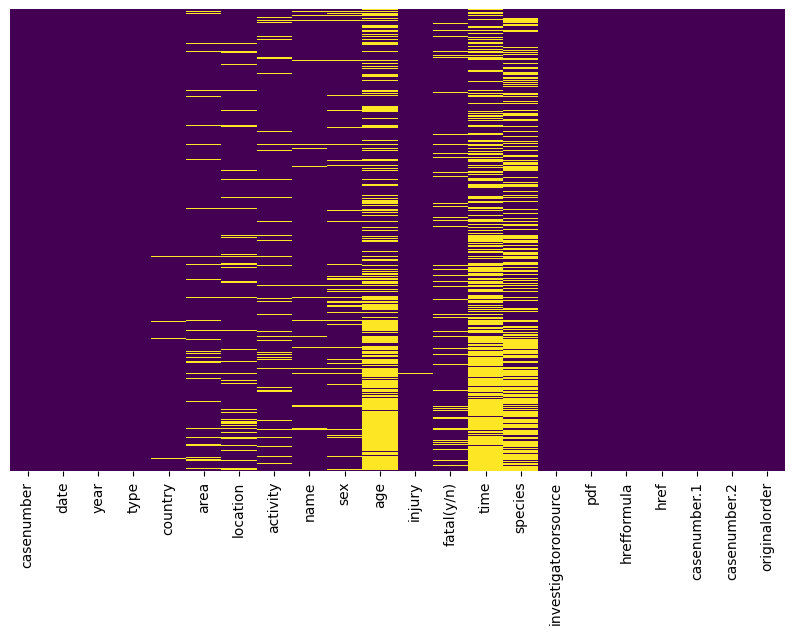

In [43]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(data.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [44]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

casenumber                 1
date                       8
year                      10
type                      12
country                   58
area                     463
location                 548
activity                 552
name                     218
sex                      573
age                     2839
injury                    36
fatal(y/n)               547
time                    3362
species                 2846
investigatororsource      25
pdf                        8
hrefformula                9
href                       8
casenumber.1               8
casenumber.2               8
originalorder              1
dtype: int64

In [45]:
data.year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [46]:
data.year.value_counts().head()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
Name: year, dtype: int64

In [47]:
bad_index=data.year[data.year.isna()].index
bad_index

Int64Index([187, 6079, 6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309], dtype='int64')

In [48]:
data.iloc[bad_index]

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data = data[:6302]

In [50]:
data.shape

(6302, 22)

In [51]:
data.tail()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [52]:
bad_index=data.year[data.year.isna()].index
bad_index

Int64Index([187, 6079], dtype='int64')

In [53]:
data.iloc[bad_index]

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [54]:
data.year[187] = 2017

In [55]:
data.year[6079] = 1836

In [56]:
data.year.value_counts().head()

2015.0    143
2017.0    137
2016.0    130
2011.0    128
2014.0    127
Name: year, dtype: int64

In [57]:
def conv_to_int(x):
    try:
        x = int(x)
    except:
        pass
    return x

In [58]:
data.year = data.year.apply(conv_to_int)

In [59]:
data.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988,
       1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

In [60]:
data[data.year == 500] 

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
6174,0500.00.00,Circa 500 A.D.,500,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,Foot severed,N,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129.0


In [61]:
data[data.year == 77]

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
6175,0077.00.00,77 A.D.,77,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,NaN,FATAL,Y,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,128.0


In [62]:
data[data.year == 5]

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
6176,0005.00.00,Ca. 5 A.D.,5,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,Aboriginal rock carving depicts man being atta...,N,NaN,NaN,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,127.0


In [63]:
data[data.year == 0].head()# habría que fijarse en la columna date de la correspondiente fila del siguiente DF y rellenar

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
6177,0000.0214,Ca. 214 B.C.,0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0214,0000.0214,126.0
6178,0000.0336,Ca. 336.B.C..,0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0336,0000.0336,125.0
6179,0000.0493,493 B.C.,0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0493,0000.0493,124.0
6180,0000.0725,Ca. 725 B.C.,0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0
6181,ND-0154,Before 1939,0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0


In [64]:
data[data.year == 0].index

Int64Index([6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186,
            ...
            6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301],
           dtype='int64', length=125)

In [65]:
data.date[data.year==0].value_counts().head()

No date                 6
No date, Before 1963    5
Before 1906             4
Before 1958             4
1940 - 1950             3
Name: date, dtype: int64

In [66]:
data[data.year == 0].index

Int64Index([6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186,
            ...
            6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301],
           dtype='int64', length=125)

In [67]:
data.year[data[data.year == 0].index] = 'to be deeply clarified'

In [68]:
data[data.year == 'to be deeply clarified'].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
6177,0000.0214,Ca. 214 B.C.,to be deeply clarified,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0214,0000.0214,126.0
6178,0000.0336,Ca. 336.B.C..,to be deeply clarified,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0336,0000.0336,125.0
6179,0000.0493,493 B.C.,to be deeply clarified,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0493,0000.0493,124.0
6180,0000.0725,Ca. 725 B.C.,to be deeply clarified,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0
6181,ND-0154,Before 1939,to be deeply clarified,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0


In [69]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

casenumber                 1
type                       4
country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [70]:
# columnas categóricas con nulos

In [71]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [72]:
bad_index=data.casenumber[data.casenumber.isna()].index
bad_index

Int64Index([5488], dtype='int64')

In [73]:
data.iloc[bad_index]

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
5488,NaN,Reported 06-Sep-1905,1905,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0


In [74]:
data.casenumber.value_counts().head()

1983.06.15      2
1913.08.27.R    2
2009.12.18      2
2014.08.02      2
1920.00.00.b    2
Name: casenumber, dtype: int64

In [75]:
type(data.casenumber[5489])

str

In [76]:
data.casenumber[5488] = '1905.09.06'

In [77]:
data.casenumber[5488]

'1905.09.06'

In [78]:
# fin nulos casenumber

In [79]:
# columna Type

In [80]:
bad_index=data.type[data.type.isna()].index
bad_index

Int64Index([85, 382, 4867, 5705], dtype='int64')

In [81]:
data.iloc[bad_index]

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
85,2017.09.15.a,15-Sep-2017,2017,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0
382,2015.07.27,27-Jul-2015,2015,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0
4867,1936.09.11.R,Reported 11-Sep-1936,1936,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0
5705,1890.03.03.R,Reported 03-Mar-1890,1890,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0


In [82]:
data.type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [83]:
data.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [84]:
data.type.fillna('unknown', inplace=True)

In [85]:
def limpiar_basico(x): return x.strip().lower()

In [86]:
data.type = data.type.apply(limpiar_basico)

In [87]:
data.type.value_counts()

unprovoked      4595
provoked         574
invalid          547
sea disaster     239
boating          203
boat             137
unknown            4
questionable       2
boatomg            1
Name: type, dtype: int64

In [88]:
data[(data.type == 'boating')].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018,boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
86,2017.09.14,Sep-2017,2017,boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0
105,2017.08.01,01-Aug-2017,2017,boating,USA,California,"Between Pescadero Point & Bean Hollow Beach, S...",Kayaking / Fishing,Patrick Conroy,M,NaN,"No injury, bow of kayak bitten",N,10h45,"White shark, 10'","R. Collier, GSAF",2017.08.01-Conroy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.01,2017.08.01,6198.0
116,2017.07.20.b,20-Jul-2017,2017,boating,USA,California,"Stearns Wharf, Santa Barbara",Kayaking,Bret Jackson,M,40,"No injury, kayak bitten",N,11h20,"White shark, 11' to 13'","R. Collier, GSAF",2017.07.20.b-Jackson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.20.b,2017.07.20.b,6187.0
120,2017.07.11,11-Jul-2017,2017,boating,USA,California,"Santa Cruz, Santa Cruz County",Kayaking,Steve Lawson,M,NaN,"No injury, kayak bitten",N,11h00,White shark,"R. Collier, GSAF",2017.07.11-Lawson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.11,2017.07.11,6183.0


In [89]:
data[(data.type == 'boat')].index

Int64Index([ 538,  565,  706,  818,  864,  956,  971, 1164, 1168, 1174,
            ...
            4188, 4214, 4242, 6070, 6087, 6127, 6136, 6145, 6212, 6274],
           dtype='int64', length=137)

In [90]:
data.type[data[(data.type == 'boat')].index] = 'boating'

In [91]:
data.type.iloc[1152] = 'boating'

In [92]:
data.type.value_counts()

unprovoked      4595
provoked         574
invalid          547
boating          341
sea disaster     239
unknown            4
questionable       2
Name: type, dtype: int64

In [93]:
data[data.type == 'questionable'].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
16,2018.05.09,09-May-2018,2018,questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,NaN,"No injury, surfboard damaged",N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0
20,2018.04.25.b,25-Apr-2018,2018,questionable,AUSTRALIA,New South Wales,Lennox Head,Surfing,Matthew Lee,M,NaN,No injury,N,07h00,Questionable,"B. Myatt, GSAF",2018.04.25.b-Lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.b,2018.04.25.b,6283.0


In [94]:
data[data.type == 'unknown'].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
85,2017.09.15.a,15-Sep-2017,2017,unknown,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0
382,2015.07.27,27-Jul-2015,2015,unknown,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0
4867,1936.09.11.R,Reported 11-Sep-1936,1936,unknown,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0
5705,1890.03.03.R,Reported 03-Mar-1890,1890,unknown,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0


In [95]:
# fin columna type

In [96]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [97]:
bad_index=data.country[data.country.isna()].index
bad_index

Int64Index([  62,  525, 2956, 3378, 3387, 3388, 3395, 3399, 3425, 3605, 3661,
            4018, 4231, 4266, 4498, 4639, 4700, 4712, 4726, 4729, 4911, 5020,
            5060, 5425, 5586, 5587, 5612, 5636, 5742, 5770, 5808, 5810, 5839,
            5885, 5920, 5996, 6001, 6092, 6119, 6131, 6133, 6137, 6155, 6165,
            6171, 6175, 6177, 6199, 6206, 6259],
           dtype='int64')

In [98]:
data.iloc[bad_index].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
62,2017.11.13.R,Reported 13-Nov-2017,2017,unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0
525,2014.08.00,Aug-2014,2014,invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0
2956,1983.00.00.d,Ca. 1983,1983,unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0
3378,1970.11.00,Nov-1970,1970,unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0
3387,1970.08.02,02-Aug-1970,1970,invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0


In [99]:
data.country.fillna('unknown', inplace=True)

In [100]:
data.country.value_counts().head()

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
Name: country, dtype: int64

In [101]:
data.country = data.country.apply(limpiar_basico)

In [102]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [103]:
bad_index=data.area[data.area.isna()].index
bad_index

Int64Index([  32,   33,   48,   56,   59,   62,   90,  101,  129,  132,
            ...
            6269, 6270, 6273, 6276, 6280, 6291, 6293, 6294, 6295, 6300],
           dtype='int64', length=455)

In [104]:
data.iloc[bad_index].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
32,2018.04.09,09-Apr-2018,2018,unprovoked,new caledonia,NaN,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,NaN,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0
33,2018.04.05,05-Apr-2018,2018,unprovoked,bahamas,NaN,Bimini,Swimming,Shane McConnell,M,12,"2 puncture wounds to left foot, abrasion to ri...",N,18h00,Bull shark,"K. McMurray, TrackingSharks.com",2018.04.05-McConnell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.05,2018.04.05,6270.0
48,2018.01.21,21-Jan-2018,2018,unprovoked,new caledonia,NaN,Nouville,Spearfishing,male,M,40s,Injuries to abdomen and arm,N,15h30,"Bull shark, 3 m",TrackingSharks.com,2018.01.21-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.21,2018.01.21,6255.0
56,2017.12.09,09-Dec-2017,2017,unprovoked,bahamas,NaN,NaN,Snorkeling,Sarah Illig-Carroll,F,25,Minor injury to arm,N,NaN,Nurse shark. 5',"Daily Star, 12/11/2017",2017.12.09-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.09,2017.12.09,6247.0
59,2017.11.25.R,Reported 25-Nov-2017,2017,sea disaster,libya,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0


In [105]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018,boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018,unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018,invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [106]:
data.area.fillna('unknown', inplace=True)

In [107]:
data.area.value_counts().head()

Florida            1037
New South Wales     486
unknown             455
Queensland          311
Hawaii              298
Name: area, dtype: int64

In [108]:
def conv_str(x): return str(x)

In [109]:
data.area = data.area.apply(conv_str)

In [110]:
data.area = data.area.apply(limpiar_basico)

In [111]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [112]:
# columna location

In [113]:
bad_index=data.location[data.location.isna()].index
bad_index

Int64Index([  56,   62,  101,  110,  132,  151,  171,  174,  180,  187,
            ...
            6273, 6274, 6276, 6280, 6287, 6291, 6293, 6294, 6295, 6298],
           dtype='int64', length=540)

In [114]:
data.iloc[bad_index].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
56,2017.12.09,09-Dec-2017,2017,unprovoked,bahamas,unknown,NaN,Snorkeling,Sarah Illig-Carroll,F,25,Minor injury to arm,N,NaN,Nurse shark. 5',"Daily Star, 12/11/2017",2017.12.09-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.09,2017.12.09,6247.0
62,2017.11.13.R,Reported 13-Nov-2017,2017,unprovoked,unknown,unknown,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0
101,2017.08.18,18-Aug-2017,2017,unprovoked,bahamas,unknown,NaN,Spearfishing,male,M,NaN,Hand injured,N,15h00,5' shark,"CBS12, 8/18/2017",2017.08.18-JupiterDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.18,2017.08.18,6202.0
110,2017.07.26.R,Reported 26-Jul-2017,2017,unprovoked,bahamas,40 miles off grand bahama island,NaN,Spearfishing,Michael Massey,M,NaN,Severe lacerations to left hand,N,NaN,NaN,"RevistaJaraysedal.es, 7/26/2017",2017.07.26.R-Massey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.26.R,2017.07.26.R,6193.0
132,2017.06.14.R,Reported 14-Jun-2017,2017,unprovoked,bahamas,unknown,NaN,Feeding sharks,Carly,F,NaN,Fingernail pulled off,N,NaN,NaN,"AOL.UK, 6/14/2017",2017.06.14.R-Carly.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.14.R,2017.06.14.R,6171.0


In [115]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018,boating,usa,california,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018,unprovoked,usa,georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018,invalid,usa,hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,new south wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [116]:
data.location.fillna('unknown', inplace=True)

In [117]:
data.location.value_counts().head()

unknown                             540
New Smyrna Beach, Volusia County    163
Daytona Beach, Volusia County        30
Ponce Inlet, Volusia County          20
Melbourne Beach, Brevard County      18
Name: location, dtype: int64

In [118]:
data.location = data.location.apply(conv_str)

In [119]:
data.location = data.location.apply(limpiar_basico)

In [120]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [121]:
bad_index=data.activity[data.activity.isna()].index
bad_index

Int64Index([  47,  108,  112,  114,  154,  182,  185,  245,  255,  289,
            ...
            6244, 6245, 6252, 6258, 6263, 6269, 6277, 6282, 6292, 6300],
           dtype='int64', length=544)

In [122]:
data.iloc[bad_index].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
47,2018.01.28,28-Jan-2018,2018,unprovoked,australia,western australia,cone bay,NaN,male,M,18,Injuries to right leg,N,08h00,Bull shark,"ABC.net.au, 01/28/2018",2018.01.28-ConeBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.28,2018.01.28,6256.0
108,2017.07.29.a,29-Jul-2017,2017,unprovoked,usa,south carolina,"debordieu colony, georgetown county",NaN,female x 2,F,12,Bite to left thigh / minor injury,N,Afternoon,NaN,"C. Creswell, GSAF",2017.07.29.a-Georgetown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.29.a,2017.07.29.a,6195.0
112,2017.07.23.b,23-Jul-2017,2017,unprovoked,usa,new jersey,ventnor,NaN,Isabella Smith,F,NaN,Minor injury to hand,N,NaN,Sandtiger shark 2',A. Smith,2017.07.23.b-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.23.b,2017.07.23.b,6191.0
114,2017.07.22,22-Jul-2017,2017,unprovoked,usa,florida,"snipes point, monroe county",NaN,female,F,40,Foot bitten,N,12h30,"""A small shark""","NBC Miami, 7/23/2017",2017.07.22-Keys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.22,2017.07.22,6189.0
154,2017.04.17.b,17-Apr-2017,2017,unprovoked,usa,florida,"daytona beach, volusia county",NaN,NaN,NaN,NaN,Minor bite to the foot,N,Afternoon,NaN,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0


In [123]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018,boating,usa,california,"oceanside, san diego county",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018,unprovoked,usa,georgia,"st. simon island, glynn county",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018,invalid,usa,hawaii,"habush, oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,new south wales,arrawarra headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,colima,la ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [124]:
data.activity.fillna('unknown', inplace=True)

In [125]:
data.activity = data.activity.apply(limpiar_basico)

In [126]:
data.activity.value_counts().head()

surfing         976
swimming        916
unknown         547
fishing         444
spearfishing    340
Name: activity, dtype: int64

In [127]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [128]:
bad_index=data.name[data.name.isna()].index
bad_index

Int64Index([  32,   86,  124,  154,  184,  226,  560,  701,  721,  771,
            ...
            6130, 6132, 6139, 6141, 6157, 6185, 6197, 6218, 6237, 6278],
           dtype='int64', length=210)

In [129]:
data.iloc[bad_index].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
32,2018.04.09,09-Apr-2018,2018,unprovoked,new caledonia,unknown,"magenta beach, noumea",windsurfing,NaN,NaN,NaN,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0
86,2017.09.14,Sep-2017,2017,boating,australia,westerm australia,esperance,fishing,NaN,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0
124,2017.07.02,02-Jul-2017,2017,invalid,comoros,anjouan,moya,fishing,NaN,NaN,NaN,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0
154,2017.04.17.b,17-Apr-2017,2017,unprovoked,usa,florida,"daytona beach, volusia county",unknown,NaN,NaN,NaN,Minor bite to the foot,N,Afternoon,NaN,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0
184,2017.01.13.b,13-Jan-2017,2017,unprovoked,australia,queensland,clairview,swimming,NaN,M,57,Injury to hand,N,13h30,NaN,"Brisbane Times,1/13/2017",2017.01.13.b-Clairview.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.13.b,2017.01.13.b,6119.0


In [130]:
data.name.unique()

array(['Julie Wolfe', 'Adyson\xa0McNeely ', 'John Denges', ...,
       'A "chiefess"', 'Ahmun', 'Jules Patterson'], dtype=object)

In [131]:
data.shape

(6302, 22)

In [132]:
data.name.fillna('unknown', inplace=True)

In [133]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [134]:
bad_index=data.sex[data.sex.isna()].index
bad_index

Int64Index([  32,   59,   86,  124,  154,  179,  218,  226,  243,  297,
            ...
            6166, 6167, 6185, 6197, 6202, 6212, 6237, 6259, 6278, 6287],
           dtype='int64', length=565)

In [135]:
data.iloc[bad_index].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
32,2018.04.09,09-Apr-2018,2018,unprovoked,new caledonia,unknown,"magenta beach, noumea",windsurfing,unknown,NaN,NaN,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0
59,2017.11.25.R,Reported 25-Nov-2017,2017,sea disaster,libya,unknown,gars garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0
86,2017.09.14,Sep-2017,2017,boating,australia,westerm australia,esperance,fishing,unknown,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0
124,2017.07.02,02-Jul-2017,2017,invalid,comoros,anjouan,moya,fishing,unknown,NaN,NaN,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0
154,2017.04.17.b,17-Apr-2017,2017,unprovoked,usa,florida,"daytona beach, volusia county",unknown,unknown,NaN,NaN,Minor bite to the foot,N,Afternoon,NaN,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0


In [136]:
data.sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [137]:
data.sex.value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: sex, dtype: int64

In [138]:
data.sex.fillna('unknown', inplace=True)

In [139]:
data.sex.value_counts()

M          5094
F           637
unknown     565
M             2
N             2
lli           1
.             1
Name: sex, dtype: int64

In [140]:
data.sex = data.sex.apply(limpiar_basico)

In [141]:
data[data.sex == 'n']

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
4938,1934.07.11,11-Jul-1934,1934,boating,australia,new south wales,cronulla,fishing,"18' boat, occupants William & Leslie Newton",n,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0
6131,1801.12.18.R,Reported 18-Dec-1801,1801,provoked,unknown,unknown,unknown,standing on landed shark's tail,Stephen Pettigew,n,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1801.12.18.R,1801.12.18.R,172.0


In [142]:
data.sex.iloc[6131] = 'm'

In [143]:
data.sex.iloc[4938]  = 'unknown'

In [144]:
data[data.sex == 'lli']

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
1624,2004.11.11.b,11-Nov-2004,2004,unprovoked,usa,california,"bunkers, humboldt bay, eureka, humboldt county",surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0


In [145]:
data.sex.iloc[1624] = 'm'

In [146]:
data[data.sex == '.']

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
5437,1908.06.02.R,Reported 02-Jun-1908,1908,sea disaster,papua new guinea,new britain,matupi,.,unknown,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908",1908.06.02.R-Matupi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.06.02.R,1908.06.02.R,866.0


In [147]:
data.sex.iloc[5437] = 'unknown'

In [148]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [149]:
bad_index=data.age[data.age.isna()].index
bad_index

Int64Index([   3,    4,    5,   15,   16,   17,   19,   20,   22,   30,
            ...
            6291, 6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300],
           dtype='int64', length=2831)

In [150]:
data.iloc[bad_index].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,colima,la ticla,free diving,Gustavo Ramos,m,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,03-Jun-2018,2018,unprovoked,australia,new south wales,"flat rock, ballina",kite surfing,Chris,m,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0
15,2018.05.12,12-May-2018,2018,unprovoked,south africa,eastern cape province,"nahoon beach, east london",surfing,male,m,NaN,"Minor injury, marks on board",N,11h00,NaN,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.12,2018.05.12,6288.0
16,2018.05.09,09-May-2018,2018,questionable,australia,new south wales,"sharpes beach, ballina",surfing,male,m,NaN,"No injury, surfboard damaged",N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0


In [151]:
data.age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [152]:
data.age.value_counts().head()

17    154
18    150
19    142
20    141
15    139
Name: age, dtype: int64

In [153]:
data.age.fillna('unknown', inplace=True)

In [154]:
data.age.unique()

array(['57', '11', '48', 'unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 3

In [155]:
data.age.value_counts().head()

unknown    2831
17          154
18          150
19          142
20          141
Name: age, dtype: int64

In [156]:
len(data.age)

6302

In [157]:
data.age = data.age.str.replace(' ', '')

In [158]:
def limpiar_age(row):
    row = row.strip()
    
    if 'Teen' in row or 'teen' in row:
        return '15'
    elif 'or' in row:
        index = row.index('r')
        return row[index+1:]
    elif '&' in row:
        index = row.index('&')
        return row[index+1:]
    elif 'to' in row:
        index = row.index('o')
        return row[index+1:]
    elif 'young' in row:
        return '15'
    elif 'month' in row:
        return '1'
    elif 'adult' in row:
        return '40'
    else:
        return row

In [159]:
data.age = data.age.apply(limpiar_age)

In [160]:
data.age.value_counts().head()

unknown    2831
15          157
17          154
18          152
19          144
Name: age, dtype: int64

In [161]:
data.age = data.age.str.replace('s', '')
data.age = data.age.str.replace('?', '')
data.age = data.age.str.replace('>', '')
data.age = data.age.str.replace('½', '')
data.age = data.age.str.replace("'", '')
data.age = data.age.str.replace("mid-", '')
data.age = data.age.str.replace("Both", '')
data.age = data.age.str.replace('"middle-age"', '40')
data.age = data.age.str.replace('Ca.', '')
data.age = data.age.str.replace('Elderly', 'unknown')
data.age = data.age.str.replace('MAKELINEGREEN', 'unknown')
data.age = data.age.str.replace('A.M.', 'unknown')
data.age = data.age.str.replace('X', 'unknown')
data.age = data.age.str.replace('F', 'unknown')
data.age = data.age.str.replace('4033', '36')
data.age = data.age.str.replace('month', '')

In [162]:
data.age = data.age.str.replace('4033', '36')
data.age = data.age.str.replace('month', '')
#data.age = data.age.str.replace('unknown', '')

In [163]:
data.age.value_counts()

unknown    2836
15          157
17          154
20          153
18          152
19          144
16          139
21          119
22          118
25          108
24          106
14          103
13           95
26           88
30           88
28           82
23           81
27           79
29           78
12           75
35           72
32           70
40           62
10           59
31           53
34           51
38           48
33           46
36           44
43           44
37           44
42           38
39           38
11           38
41           38
50           36
9            35
52           35
45           33
47           30
8            30
44           29
49           28
48           28
46           27
55           23
7            22
51           20
60           18
54           17
57           16
58           15
6            15
53           13
61           13
59           11
69           10
56           10
63            9
62            8
68            7
5             7
70      

In [164]:
data[data.age=='']

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
1824,2002.09.27.b,27-Sep-2002,2002,provoked,usa,florida,"key largo, monroe county",fishing,Jose Diaz,m,,Left thumb lacerated PROVOKED INCIDENT,N,Afternoon,1.8 m [6'] blacktip shark,"J. Eager, scubaradio.com",2002.09.27.b-Diaz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.09.27.b,2002.09.27.b,4479.0
1825,2002.09.27.a,27-Sep-2002,2002,provoked,tonga,vava'u,swimming with humpback whales,swimming,Felipe Tonga,m,,Thigh lacerated PROVOKED INCIDENT,N,15h00,"Tiger shark, 1.5 m [5']k",C. Butterfield,2002.09.27.a-Tonga.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.09.27.a,2002.09.27.a,4478.0
1925,2001.08.12,12-Aug-2001,2001,unprovoked,thailand,rayong province,laem mae pim beach,fell off banana boat,O. Jaimaung & friend,m,,Legs bitten,N,NaN,3 m [10'] shark,O. Jaimuang,2001.08.12-Jaimuang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.08.12,2001.08.12,4378.0
3108,1978.12.29,29-Dec-1978,1978,unprovoked,australia,queensland,bribie island,unknown,Wayne Brown,m,,Survived,N,NaN,NaN,"R. McKenzie, Sunday Mail, 9/6/1987, p.11",1978.12.29-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1978.12.29,1978.12.29,3195.0
5084,1929.01.27,27-Jan-1929,1929,unprovoked,australia,queensland,"alma bay, magnetic island, townsville",swimming,Harry Weatherall,m,,"FATAL, right buttock lacerated, left arm sever...",Y,17h30,NaN,V.M. Coppleson.Q.6. (1933); V.M. Coppleson (19...,1929.01.27-Weatherall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1929.01.27,1929.01.27,1219.0


In [165]:
data.age.iloc[[1824, 1825, 1925, 3108, 5084]] = 'unknown'

In [166]:
data.age.value_counts().head()

unknown    2841
15          157
17          154
20          153
18          152
Name: age, dtype: int64

In [167]:
data.age.describe()

count        6302
unique         82
top       unknown
freq         2841
Name: age, dtype: object

In [168]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

injury                    28
fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [169]:
bad_index=data.injury[data.injury.isna()].index
bad_index

Int64Index([1270, 1366, 2250, 2267, 2648, 3038, 3207, 3298, 3434, 3457, 3491,
            3712, 3838, 3841, 4060, 4517, 4976, 5370, 5547, 5965, 6140, 6153,
            6165, 6166, 6167, 6171, 6172, 6277],
           dtype='int64')

In [170]:
data.iloc[bad_index].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
1270,2008.04.20.a,20-Apr-2008,2008,unprovoked,australia,new south wales,crescent head,unknown,Jamie Adlington,m,unknown,NaN,UNKNOWN,NaN,"Tiger shark, 2.3m","T. Peake, GSAF",2008.04.20.a-Adlington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.20.a,2008.04.20.a,5033.0
1366,2007.07.00,Jul-2007,2007,invalid,senegal,unknown,unknown,murder,Alex Takyi,unknown,unknown,NaN,NaN,NaN,Questionable Incident,"Daily Guide, 8/20/2007",2007.07.00-Takyi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.07.00,2007.07.00,4937.0
2250,1997.06.07,07-Jun-1997,1997,unprovoked,brazil,rio de janeiro,"copacabana, rio de janeiro",bathing,José Luiz Lipiani,m,unknown,NaN,UNKNOWN,NaN,NaN,"Globo, 6/9/1997",1997.06.07-NV-Lipiani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.06.07,1997.06.07,4053.0
2267,1996.12.29,29-Dec-1996,1996,unprovoked,australia,queensland,coolum beach,surfing,Blair Hall,m,18,NaN,UNKNOWN,18h00,NaN,"The Advertiser, 12/30/1996, p.3",1996.12.29-BlairHall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.12.29,1996.12.29,4036.0
2648,1990.00.00,1990,1990,unprovoked,usa,florida,"pensacola, escambia county",surfing,male,m,17,NaN,UNKNOWN,NaN,NaN,NaN,1990.00.00-NV-Pensacola.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.00.00,1990.00.00,3655.0


In [171]:
data.injury.unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [172]:
data.injury.value_counts().head()

FATAL          802
Survived        97
Foot bitten     87
No injury       82
Leg bitten      72
Name: injury, dtype: int64

In [173]:
data.injury.fillna('unknown', inplace=True)

In [174]:
data.injury = data.injury.apply(limpiar_basico)

In [175]:
bad_index=data.injury[data.injury.isna()].index
bad_index

Int64Index([], dtype='int64')

In [176]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

fatal(y/n)               539
time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [177]:
bad_index=data['fatal(y/n)'][data['fatal(y/n)'].isna()].index
bad_index

Int64Index([  27,   76,   79,   84,   98,  107,  115,  124,  125,  145,
            ...
            6110, 6111, 6122, 6125, 6126, 6147, 6157, 6158, 6164, 6232],
           dtype='int64', length=539)

In [178]:
data['fatal(y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [179]:
data['fatal(y/n)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal(y/n), dtype: int64

In [180]:
data['fatal(y/n)'].fillna('unknown', inplace=True)

In [181]:
data['fatal(y/n)'] = data['fatal(y/n)'].apply(limpiar_basico)

In [182]:
data[data['fatal(y/n)'] == 'm']

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
285,2016.04.18.b,18-Apr-2016,2016,provoked,french polynesia,tuamotos,makemo atoll,spearfishing,Hoata Iotua,m,22,laceration to knee by speared shark provoked i...,m,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0


In [183]:
data.injury[data['fatal(y/n)'] == 'm']

285    laceration to knee by speared shark provoked i...
Name: injury, dtype: object

In [184]:
data['fatal(y/n)'].iloc[285] = 'n'

In [185]:
data[data['fatal(y/n)'] == '2017']

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
786,2012.06.10,10-Jun-2012,2012,provoked,italy,sardinia,muravera,attempting to rescue an injured & beached shark,Giorgio Zara,m,57,lower left leg injured provoked accident,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0


In [186]:
data['fatal(y/n)'].iloc[786] = 'n'

In [187]:
bad_index=data.time[data['fatal(y/n)'].isna()].index
bad_index

Int64Index([], dtype='int64')

In [188]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

time                    3354
species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [189]:
bad_index=data.time[data.time.isna()].index
bad_index

Int64Index([   3,    4,    5,    7,   11,   14,   17,   25,   26,   27,
            ...
            6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301],
           dtype='int64', length=3354)

In [190]:
data.time.unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

In [191]:
data.time.value_counts().head()

Afternoon    187
11h00        128
Morning      121
12h00        109
15h00        108
Name: time, dtype: int64

In [192]:
data.time.fillna('unknown', inplace=True)

In [193]:
type(data.time[0])

str

In [194]:
data.time = data.time.apply(conv_str)

In [195]:
lst = []

for e in data.time:
    
    e = e.lower().strip()
    
    e = e.replace('>', '')
    e = e.replace('<', '')
    e = e.replace('sometime between 06h00 & 08hoo', '07')
    e = e.replace('8:04 pm', '20')
    e = e.replace('between 11h00 & 12h00', '11')
    e = e.replace('between 05h00 and 08h00', '06')
    e = e.replace('before 10h30', '06')
    

    if e[:2] in '00010203040506070809101112131415161718192021222324':
        lst.append(e[:2])
    elif 'morning' in e or 'a.m.' in e or 'am' in e or 'before noon' in e or 'dawn' in e or "after lunch" in e or 'between 06h00 & 07h20' in e or 'prior to 10h37' in e or 'shortly before 13h00' in e or 'just after 12h00' in e or 'shortly before 12h00' in e or 'before 07h00' in e or 'just before 11h00' in e or '9h00' in e:
        lst.append('morning')  
    elif 'afternoon' in e or 'afternon' in e or 'after noon' in e or 'midday' in e or 'p.m.' in e or 'lunchtime' in e or 'noon' in e:
        lst.append('afternoon')
    elif 'evening' in e or 'sunset' in e or 'daybreak' in e or 'just before sundown' in e:
        lst.append('evening')
    elif 'dusk' in e or 'night' in e or 'dark' in e or 'ship aban-doned at 03h10' in e or 'after 04h00' in e:
        lst.append('night')
    elif '--' in e or 'x' in e:
        lst.append('unknown')       
    else:
        lst.append('unknown')


In [196]:
data['time_2'] = lst

In [197]:
data.time_2.value_counts()

unknown      3363
afternoon     261
11            258
16            242
15            239
14            237
12            202
13            200
17            199
10            179
morning       166
18            131
09            123
night          96
08             93
07             83
19             53
evening        44
06             39
20             31
05             11
03              9
23              8
02              7
01              6
21              5
22              5
                5
04              5
00              1
30              1
Name: time_2, dtype: int64

In [198]:
data.time_2 = data.time_2.str.replace('30', 'unknown')

In [199]:
len(data.time_2)

6302

In [200]:
def tramos_día(x):
    
    mañana_horas = ['06', '07', '08', '09', '10', '11', '12', '13']
    tarde_horas = ['14', '15', '16', '17', '18', '19', '20', '21']
    noche_horas = ['22', '23', '00', '01', '02', '03', '04', '05']
    
    if x in mañana_horas:
        return 'morning'
    elif x in tarde_horas:
        return 'afternoon'
    elif x in noche_horas:
        return 'night'
    elif x == 'evening':
        return 'afternoon'
    else:
        return x

In [201]:
data.time_2 = data.time_2.apply(tramos_día)

In [202]:
data.time_2.value_counts()

unknown      3364
afternoon    1442
morning      1343
night         148
                5
Name: time_2, dtype: int64

In [203]:
data[data.time_2=='']

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,time_2
1384,2007.05.04,04-May-2007,2007,sea disaster,turks & caicos,providenciales,unknown,sea disaster,Haitian refugees perished when their boat caps...,unknown,unknown,some of the bodies recovered had been bitten b...,y,,NaN,CNN,2007.05.04-HaitianRefugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.05.04,2007.05.04,4919.0,
1826,2002.09.21.b,21-Sep-2002,2002,unprovoked,usa,oregon,cape kiwanda,boogie boarding or surfing,Garry Turner,m,24,ankle lacerated,n,,2.4 m [8'] shark,"R. Collier, GSAF",2002.09.21.b-GarryTurner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.09.21.b,2002.09.21.b,4477.0,
1855,2002.06.03,03-Jun-2002,2002,unprovoked,south africa,kwazulu-natal between port edward and port st ...,off mkhambati,snorkeling (filming the sardine run),Tony White,m,50,upper arm bitten,n,,1.5 to 2.5 m [5' to 8.25'] copper shark,T. White,2002.06.03-White.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.06.03,2002.06.03,4448.0,
5148,1926.07.08,08-Jul-1926,1926,unprovoked,usa,california,"san francisco bay (or san leandro bay), near c...",swimming with dog near canning factory,Norman Piexotto,m,15,leg & hand lacerated and dog bitten,n,,1.5 m [5'] white shark or sevengill shark,"D. Miller & R. Collier, R. Collier, p. __; V.M...",1926.07.08-Peixotto_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1926.07.08,1926.07.08,1155.0,
5692,1891.06.11,11-Jun-1891,1891,invalid,usa,virginia,hampton roads,fishing for sharks when he became entangled in...,John Howard,m,unknown,"fatal, but death may have been due to drowning",unknown,,Shark involvement prior to death unconfirmed,"Washington Post, 6/12/1891, p.1",1891.06.11-JohnHoward.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1891.06.11,1891.06.11,611.0,


In [204]:
data.time_2.iloc[[1384, 1826, 1855, 5148, 5692]] = 'unknown'

In [205]:
data.time.unique()

array(['18h00', '14h00  -15h00', '07h45', 'unknown', 'Late afternoon',
       '17h00', '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30',
       '10h40', '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40',
       '08h00', '17h35', '15h30', '07h30', '19h00, Dusk', 'Night',
       '16h00', '15h01', '12h00', '13h45', '23h30', '09h00', '14h30',
       '18h30', '12h30', '16h30', '18h45', '06h00', '10h00', '10h44',
       '13h19', 'Midday', '13h30', '10h45', '11h20', '11h45', '19h30',
       '08h30', '15h45', 'Shortly before 12h00', '17h34', '17h10',
       '11h15', '08h50', '17h45', '13h00', '10h20', '13h20', '02h00',
       '09h50', '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15',
       '15h40', '19h05', '1300', '14h30 / 15h30', '22h00', '16h20',
       '14h34', '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15'

In [206]:
data.shape

(6302, 23)

In [207]:
#data[['day_timezone']]=0
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,time_2
0,2018.06.25,25-Jun-2018,2018,boating,usa,california,"oceanside, san diego county",paddling,Julie Wolfe,f,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,afternoon
1,2018.06.18,18-Jun-2018,2018,unprovoked,usa,georgia,"st. simon island, glynn county",standing,Adyson McNeely,f,11,minor injury to left thigh,n,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,afternoon
2,2018.06.09,09-Jun-2018,2018,invalid,usa,hawaii,"habush, oahu",surfing,John Denges,m,48,injury to left lower leg from surfboard skeg,n,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,morning
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,unknown,minor injury to lower leg,n,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,colima,la ticla,free diving,Gustavo Ramos,m,unknown,lacerations to leg & hand shark provoked incident,n,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown


In [208]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

species                 2838
investigatororsource      17
hrefformula                1
dtype: int64

In [209]:
bad_index=data.species[data.species.isna()].index
bad_index

Int64Index([   1,    2,    5,    9,   11,   12,   15,   17,   19,   27,
            ...
            6288, 6289, 6290, 6291, 6292, 6297, 6298, 6299, 6300, 6301],
           dtype='int64', length=2838)

In [210]:
data.species.fillna('unknown', inplace=True)

In [211]:
lst2 = []

for x in data.species:
    
    
    x = x.lower().strip()
    
    if 'white' in x:
        lst2.append('white shark')
    elif 'tiger' in x:
        lst2.append('tiger shark')
    elif 'bull' in x:
        lst2.append('bull shark')        
    elif 'wobbegong' in x:
        lst2.append('wobbegong shark')
    elif 'blacktip' in x:
        lst2.append('blacktip shark')
    elif 'blue' in x:
        lst2.append('blue shark')
    elif 'small' in x:
        lst2.append('small shark')
    elif 'grey' in x:
        lst2.append('grey shark')
    elif 'hammer' in x:
        lst2.append('hammerhead shark')   
    elif 'raggedtooth' in x:
        lst2.append('raggedtooth shark')
    elif 'basking' in x:
        lst2.append('basking shark')  
    elif 'zambesi' in x:
        lst2.append('zambesi shark')  
    elif 'bronze whaler' in x:
        lst2.append('bronze whaler shark')  
    elif 'lemon' in x:
        lst2.append('lemon shark')  
    elif 'angel' in x:
        lst2.append('angel shark')  
    elif 'mako' in x:
        lst2.append('mako shark')  
    elif 'nurse' in x:
        lst2.append('nurse shark')  
    elif 'basking' in x:
        lst2.append('basking shark')  
    elif 'spinner' in x:
        lst2.append('spinner shark')  
    elif 'sand' in x:
        lst2.append('sand shark')  
    elif 'sevengill' in x:
        lst2.append('sevengill shark') 
    elif 'caribbean reef' in x:
        lst2.append('caribbean reef shark')       
    elif 'reef' in x:
        lst2.append('reef shark')   
    elif 'galapagos' in x:
        lst2.append('galapagos shark')    
    elif 'unconfirmed' in x or 'not confirmed' in x:
        lst2.append('shark involvement not confirmed') 
    elif 'questionable' in x:
        lst2.append('questionable incident ')     
    elif 'invalid' in x:
        lst2.append('invalid')
    elif 'unknown' in x:
        lst2.append('unknown')  
    else:
        lst2.append('shark type not clearly specified')

In [212]:
data['species_2'] = lst2

In [213]:
data.species_2.value_counts()

unknown                             2841
shark type not clearly specified    1080
white shark                          667
shark involvement not confirmed      294
tiger shark                          283
bull shark                           178
invalid                              103
blacktip shark                       101
questionable incident                 82
small shark                           71
grey shark                            65
bronze whaler shark                   63
blue shark                            56
nurse shark                           55
mako shark                            54
wobbegong shark                       50
hammerhead shark                      45
raggedtooth shark                     43
lemon shark                           34
zambesi shark                         29
sand shark                            23
spinner shark                         20
reef shark                            16
caribbean reef shark                  16
sevengill shark 

In [214]:
data[data.species_2 == 'Invalid'].index

Int64Index([], dtype='int64')

In [215]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,time_2,species_2
0,2018.06.25,25-Jun-2018,2018,boating,usa,california,"oceanside, san diego county",paddling,Julie Wolfe,f,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,afternoon,white shark
1,2018.06.18,18-Jun-2018,2018,unprovoked,usa,georgia,"st. simon island, glynn county",standing,Adyson McNeely,f,11,minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,afternoon,unknown
2,2018.06.09,09-Jun-2018,2018,invalid,usa,hawaii,"habush, oahu",surfing,John Denges,m,48,injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,morning,unknown
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,unknown,minor injury to lower leg,n,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,shark type not clearly specified
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,colima,la ticla,free diving,Gustavo Ramos,m,unknown,lacerations to leg & hand shark provoked incident,n,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,tiger shark


In [216]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

investigatororsource    17
hrefformula              1
dtype: int64

In [217]:
data=data.rename(columns={'investigatororsource': 'investigator_or_source'})  # solo una

data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigator_or_source,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,time_2,species_2
0,2018.06.25,25-Jun-2018,2018,boating,usa,california,"oceanside, san diego county",paddling,Julie Wolfe,f,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,afternoon,white shark
1,2018.06.18,18-Jun-2018,2018,unprovoked,usa,georgia,"st. simon island, glynn county",standing,Adyson McNeely,f,11,minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,afternoon,unknown
2,2018.06.09,09-Jun-2018,2018,invalid,usa,hawaii,"habush, oahu",surfing,John Denges,m,48,injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,morning,unknown
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,unknown,minor injury to lower leg,n,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,shark type not clearly specified
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,colima,la ticla,free diving,Gustavo Ramos,m,unknown,lacerations to leg & hand shark provoked incident,n,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,tiger shark


In [218]:
bad_index=data.investigator_or_source[data.investigator_or_source.isna()].index
bad_index

Int64Index([ 119,  290,  382,  631, 1130, 1242, 2125, 2144, 2460, 2648, 3508,
            3691, 4058, 4101, 5321, 6108, 6147],
           dtype='int64')

In [219]:
data.investigator_or_source.value_counts().head()

C. Moore, GSAF        105
C. Creswell, GSAF      92
S. Petersohn, GSAF     82
R. Collier             55
T. Peake, GSAF         48
Name: investigator_or_source, dtype: int64

In [220]:
data.investigator_or_source.fillna('unknown', inplace=True)

In [221]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

hrefformula    1
dtype: int64

In [222]:
data.hrefformula.head()

0    http://sharkattackfile.net/spreadsheets/pdf_di...
1    http://sharkattackfile.net/spreadsheets/pdf_di...
2    http://sharkattackfile.net/spreadsheets/pdf_di...
3    http://sharkattackfile.net/spreadsheets/pdf_di...
4    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: hrefformula, dtype: object

In [223]:
bad_index=data.hrefformula[data.hrefformula.isna()].index
bad_index

Int64Index([3244], dtype='int64')

In [224]:
data.iloc[3244]

casenumber                                                       1975.01.19
date                                                            19-Jan-1975
year                                                                   1975
type                                                             unprovoked
country                                                           australia
area                                                        south australia
location                                                         coffin bay
activity                                                            surfing
name                                                        David Barrowman
sex                                                                       m
age                                                                      17
injury                                            fatal, body not recovered
fatal(y/n)                                                                y
time        

In [225]:
data.hrefformula.unique()

array(['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf',
       ...,
       'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0003-Ocracoke_1900-1905.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0002-JulesPatterson.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf'],
      dtype=object)

In [226]:
data.hrefformula.fillna('unknown', inplace=True)

In [227]:
nan_cols=data.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [228]:
data2=data.copy()

In [229]:
# FIN DE REVISION DE VALORES NULOS

In [230]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigator_or_source,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,time_2,species_2
0,2018.06.25,25-Jun-2018,2018,boating,usa,california,"oceanside, san diego county",paddling,Julie Wolfe,f,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,afternoon,white shark
1,2018.06.18,18-Jun-2018,2018,unprovoked,usa,georgia,"st. simon island, glynn county",standing,Adyson McNeely,f,11,minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,afternoon,unknown
2,2018.06.09,09-Jun-2018,2018,invalid,usa,hawaii,"habush, oahu",surfing,John Denges,m,48,injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,morning,unknown
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,unknown,minor injury to lower leg,n,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,shark type not clearly specified
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,colima,la ticla,free diving,Gustavo Ramos,m,unknown,lacerations to leg & hand shark provoked incident,n,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,tiger shark


In [231]:
data[data.species == 'Invalid'].index

Int64Index([ 226,  578,  676,  926, 1044, 1093, 1167, 1301, 1314, 1427,
            ...
            5679, 5704, 5826, 5874, 5897, 6005, 6019, 6088, 6110, 6232],
           dtype='int64', length=102)

In [232]:
# Eliminación de filas donde la especie es inválida
#data.drop(data[data.species == 'Invalid'].index, inplace=True)

In [233]:
data[data.species == 'Invalid'].index

Int64Index([ 226,  578,  676,  926, 1044, 1093, 1167, 1301, 1314, 1427,
            ...
            5679, 5704, 5826, 5874, 5897, 6005, 6019, 6088, 6110, 6232],
           dtype='int64', length=102)

In [234]:
data.shape

(6302, 24)

In [235]:
# CÁLCULO DE ESTADÍSTICAS

In [236]:
# Columna Year
data.year.value_counts().head()

2015    143
2017    137
2016    130
2011    128
2014    127
Name: year, dtype: int64

In [237]:
data.year[data.year != 'to be deeply clarified'].describe()

count     6177
unique     248
top       2015
freq       143
Name: year, dtype: int64

In [238]:
print(data.year.mode())
print(data.year[data.year != 'to be deeply clarified'].mean())
print(data.year[data.year != 'to be deeply clarified'].median())
print(data.year[data.year != 'to be deeply clarified'].min())

0    2015
Name: year, dtype: object
1966.2731099239113
1979.0
5


In [239]:
# Columna type
data.type.value_counts()

unprovoked      4595
provoked         574
invalid          547
boating          341
sea disaster     239
unknown            4
questionable       2
Name: type, dtype: int64

In [240]:
data.type.describe()

count           6302
unique             7
top       unprovoked
freq            4595
Name: type, dtype: object

In [241]:
# Columna country
data.country.value_counts().head()

usa                 2229
australia           1338
south africa         579
papua new guinea     134
new zealand          128
Name: country, dtype: int64

In [242]:
data.country.describe()

count     6302
unique     202
top        usa
freq      2229
Name: country, dtype: object

In [243]:
# Columna sex
data.sex.value_counts()

m          5098
f           637
unknown     567
Name: sex, dtype: int64

In [244]:
# Columna age
data.age.value_counts().head()

unknown    2841
15          157
17          154
20          153
18          152
Name: age, dtype: int64

In [245]:
data.age.describe()

count        6302
unique         82
top       unknown
freq         2841
Name: age, dtype: object

In [246]:
def conv_int(x):
    try:
        x = int(x)
        return x
    except:
        return x

In [247]:
data.age = data.age.apply(conv_int)

In [248]:
print(data.age[data.age != 'unknown'].mode())
print(data.age[data.age != 'unknown'].mean())
print(data.age[data.age != 'unknown'].median())
print(data.age[data.age != 'unknown'].min())
print(data.age[data.age != 'unknown'].max())

0    15
Name: age, dtype: object
27.26581912741982
24.0
1
87


In [249]:
# Columna fatal
data['fatal(y/n)'].value_counts()

n          4303
y          1389
unknown     610
Name: fatal(y/n), dtype: int64

In [250]:
# Columna time_2
data.time_2.value_counts()

unknown      3369
afternoon    1442
morning      1343
night         148
Name: time_2, dtype: int64

In [251]:
# Columna species_2
data.species_2.value_counts()

unknown                             2841
shark type not clearly specified    1080
white shark                          667
shark involvement not confirmed      294
tiger shark                          283
bull shark                           178
invalid                              103
blacktip shark                       101
questionable incident                 82
small shark                           71
grey shark                            65
bronze whaler shark                   63
blue shark                            56
nurse shark                           55
mako shark                            54
wobbegong shark                       50
hammerhead shark                      45
raggedtooth shark                     43
lemon shark                           34
zambesi shark                         29
sand shark                            23
spinner shark                         20
reef shark                            16
caribbean reef shark                  16
sevengill shark 

In [252]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigator_or_source,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,time_2,species_2
0,2018.06.25,25-Jun-2018,2018,boating,usa,california,"oceanside, san diego county",paddling,Julie Wolfe,f,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,afternoon,white shark
1,2018.06.18,18-Jun-2018,2018,unprovoked,usa,georgia,"st. simon island, glynn county",standing,Adyson McNeely,f,11,minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,afternoon,unknown
2,2018.06.09,09-Jun-2018,2018,invalid,usa,hawaii,"habush, oahu",surfing,John Denges,m,48,injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,morning,unknown
3,2018.06.08,08-Jun-2018,2018,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,unknown,minor injury to lower leg,n,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,shark type not clearly specified
4,2018.06.04,04-Jun-2018,2018,provoked,mexico,colima,la ticla,free diving,Gustavo Ramos,m,unknown,lacerations to leg & hand shark provoked incident,n,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,tiger shark


In [253]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   casenumber              6302 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6302 non-null   object 
 3   type                    6302 non-null   object 
 4   country                 6302 non-null   object 
 5   area                    6302 non-null   object 
 6   location                6302 non-null   object 
 7   activity                6302 non-null   object 
 8   name                    6302 non-null   object 
 9   sex                     6302 non-null   object 
 10  age                     6302 non-null   object 
 11  injury                  6302 non-null   object 
 12  fatal(y/n)              6302 non-null   object 
 13  time                    6302 non-null   object 
 14  species                 6302 non-null   

In [254]:
for c in data:
    print(c)

casenumber
date
year
type
country
area
location
activity
name
sex
age
injury
fatal(y/n)
time
species
investigator_or_source
pdf
hrefformula
href
casenumber.1
casenumber.2
originalorder
time_2
species_2


In [255]:
for c in data.select_dtypes('object').columns:
    
    data[c]=data[c].astype('category')
    
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   casenumber              6302 non-null   category
 1   date                    6302 non-null   category
 2   year                    6302 non-null   category
 3   type                    6302 non-null   category
 4   country                 6302 non-null   category
 5   area                    6302 non-null   category
 6   location                6302 non-null   category
 7   activity                6302 non-null   category
 8   name                    6302 non-null   category
 9   sex                     6302 non-null   category
 10  age                     6302 non-null   category
 11  injury                  6302 non-null   category
 12  fatal(y/n)              6302 non-null   category
 13  time                    6302 non-null   category
 14  species                 

In [256]:
for c in data.select_dtypes('float').columns:
    
    data[c]=pd.to_numeric(data[c], downcast='float')
    
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   casenumber              6302 non-null   category
 1   date                    6302 non-null   category
 2   year                    6302 non-null   category
 3   type                    6302 non-null   category
 4   country                 6302 non-null   category
 5   area                    6302 non-null   category
 6   location                6302 non-null   category
 7   activity                6302 non-null   category
 8   name                    6302 non-null   category
 9   sex                     6302 non-null   category
 10  age                     6302 non-null   category
 11  injury                  6302 non-null   category
 12  fatal(y/n)              6302 non-null   category
 13  time                    6302 non-null   category
 14  species                 

In [257]:
data_ori.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [258]:
# EXPORTACION 
#data.to_csv(r'C:\Users\david\Proyectos\-Shark-attacks-David-Tejedor\attacks_clean_Z.csv', index=False)

In [259]:
#data.to_excel(r'C:\Users\david\Proyectos\-Shark-attacks-David-Tejedor\attacks_clean_excel.xls', index=False)